In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [134]:
start = '2010-01-01'
end = '2022-04-30'

df = data.DataReader('AAPL','yahoo', start, end)
df = pd.DataFrame(df)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434925
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535087
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546382
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430347


In [135]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-04-25,163.169998,158.460007,161.119995,162.880005,96046400.0,162.641037
2022-04-26,162.339996,156.720001,162.250000,156.800003,95623200.0,156.569962
2022-04-27,159.789993,155.380005,155.910004,156.570007,88063200.0,156.340302
2022-04-28,164.520004,158.929993,159.250000,163.639999,130216800.0,163.399918
2022-04-29,166.199997,157.250000,161.839996,157.649994,131587100.0,157.418701


In [137]:
#df = df.reset_index()
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434925
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535087
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546382
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430347


In [138]:
#df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434925
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535087
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546382
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430347


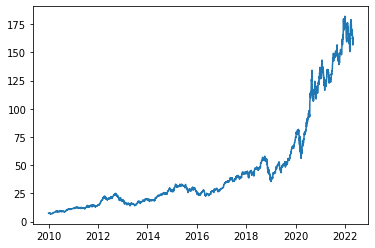

In [139]:
plt.plot(df.Close)

In [140]:
ma100 = df.Close.rolling(100).mean()
ma100

Date
2009-12-31         NaN
2010-01-04         NaN
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
                ...   
2022-04-25    169.4606
2022-04-26    169.3809
2022-04-27    169.3090
2022-04-28    169.3270
2022-04-29    169.2503
Name: Close, Length: 3104, dtype: float64

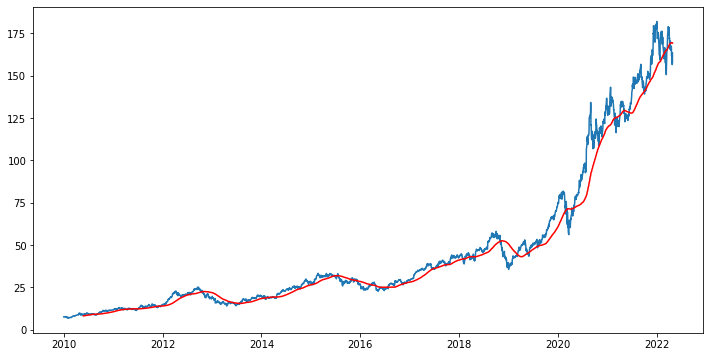

In [141]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [142]:
ma200 = df.Close.rolling(200).mean()
ma200

Date
2009-12-31          NaN
2010-01-04          NaN
2010-01-05          NaN
2010-01-06          NaN
2010-01-07          NaN
                ...    
2022-04-25    159.06185
2022-04-26    159.12335
2022-04-27    159.17800
2022-04-28    159.25045
2022-04-29    159.29630
Name: Close, Length: 3104, dtype: float64

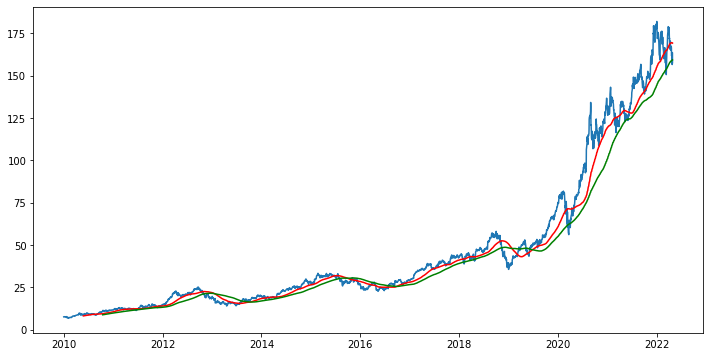

In [143]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [144]:
df.shape

(3104, 6)

In [145]:
#testing and training data

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])
print(data_training.shape)
print(data_testing.shape)


(2172, 1)
(932, 1)


In [146]:
data_training.head()

,Close
Date,
2009-12-31,7.526071
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714


In [147]:
 data_testing.head()

,Close
Date,
2018-08-17,54.395000
2018-08-20,53.865002
2018-08-21,53.759998
2018-08-22,53.762501
2018-08-23,53.872501


In [148]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler(feature_range=(0,1))

In [149]:
data_training_array = Scaler.fit_transform(data_training)
data_training_array

array([[0.01435607],
       [0.01687684],
       [0.01716121],
       ...,
       [0.98079446],
       [0.98343054],
       [1.        ]])

In [150]:
data_training_array.shape

(2172, 1)

In [151]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [152]:
x_train.shape

(2072, 100, 1)

In [43]:
# ML Model

In [205]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [206]:
model = Sequential()


model.add(LSTM(units = 50, activation='relu', return_sequences = True, 
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation='relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

In [207]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_12 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_13 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_13 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_14 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_14 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_15 (LSTM)              (None, 120)              

In [209]:
model.compile(optimizer = 'adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
65/65 [==============================] - 17s 173ms/step - loss: 0.0249
Epoch 2/50
65/65 [==============================] - 10s 158ms/step - loss: 0.0057
Epoch 3/50
65/65 [==============================] - 10s 155ms/step - loss: 0.0050
Epoch 4/50
65/65 [==============================] - 10s 149ms/step - loss: 0.0052
Epoch 5/50
65/65 [==============================] - 10s 147ms/step - loss: 0.0047
Epoch 6/50
65/65 [==============================] - 10s 146ms/step - loss: 0.0044
Epoch 7/50
65/65 [==============================] - 9s 146ms/step - loss: 0.0037
Epoch 8/50
65/65 [==============================] - 10s 147ms/step - loss: 0.0042
Epoch 9/50
65/65 [==============================] - 10s 147ms/step - loss: 0.0036
Epoch 10/50
65/65 [==============================] - 10s 147ms/step - loss: 0.0036
Epoch 11/50
65/65 [==============================] - 10s 147ms/step - loss: 0.0031
Epoch 12/50
65/65 [==============================] - 10s 149ms/step - loss: 0.0032
Epoch 13/50
65

In [210]:
model.save('prediction_model.h5')

In [211]:
data_testing.head()

,Close
Date,
2018-08-17,54.395000
2018-08-20,53.865002
2018-08-21,53.759998
2018-08-22,53.762501
2018-08-23,53.872501


In [212]:
past_100_days = data_training.tail(100)

In [213]:
final_df = past_100_days.append(data_testing)

C:\Users\praka\AppData\Local\Temp\ipykernel_9992\3401880766.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing)


In [214]:
final_df.head()

,Close
Date,
2018-03-27,42.084999
2018-03-28,41.619999
2018-03-29,41.945000
2018-04-02,41.669998
2018-04-03,42.097500


In [215]:
#input_data = Scaler.fit_transform(final_df)
input_data

array([[0.04463599],
       [0.04146112],
       [0.04368012],
       ...,
       [0.82630374],
       [0.87457543],
       [0.83367755]])

In [216]:
input_data.shape

(1032, 1)

In [217]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [218]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(932, 100, 1)
(932,)


In [219]:
#making predictions

y_predicted = model.predict(x_test)

30/30 [==============================] - 2s 45ms/step


In [220]:
y_predicted.shape

(932, 1)

In [221]:
Scaler.scale_

array([0.00682769])

In [222]:
scale_factor = 1/0.00682769
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

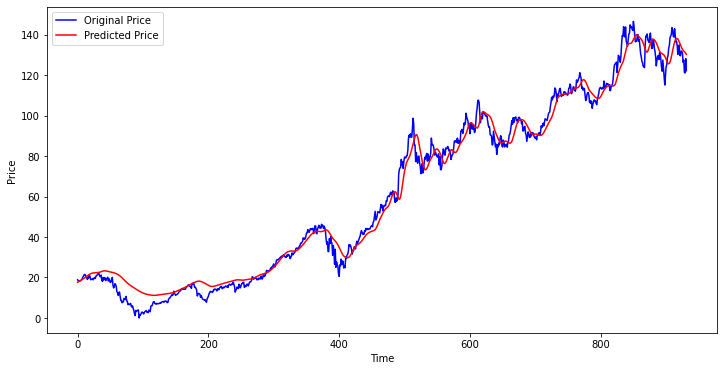

In [223]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()